## 导入库

In [5]:
import logging

from keras.models import Sequential
from keras.src.datasets.mnist import load_data
from keras.src.layers import *
from keras import Model
from keras.models import load_model
import tensorflow
from matplotlib import pyplot

## 检测GPU状态

In [6]:
print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 创建模型结构

In [7]:
inputLayer = Input((28, 28,1))

outputLayer = Conv2D(filters = 8,kernel_size = (5,5),padding = 'same')(inputLayer)
outputLayer = Activation('relu')(outputLayer)
outputLayer=MaxPool2D((3,3),(2,2),padding = 'same')(outputLayer)

outputLayer = Conv2D(filters = 32,kernel_size = (3,3),padding = 'same')(outputLayer)
outputLayer = Activation('relu')(outputLayer)
outputLayer=MaxPool2D((3,3),(2,2),padding = 'same')(outputLayer)

outputLayer = Flatten()(outputLayer)

outputLayer = Dense(256)(outputLayer)
outputLayer = Activation('relu')(outputLayer)

outputLayer = Dense(10)(outputLayer)
outputLayer = Activation('softmax')(outputLayer)

model = Model(inputLayer, outputLayer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 activation (Activation)     (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                             

## 加载数据

In [8]:
from numpy import ndarray

train_X: ndarray
train_Y: ndarray
test_X: ndarray
test_Y: ndarray
(train_X, train_Y), (test_X, test_Y) = load_data()

print("train_X:",train_X.shape)
print("train_Y:",train_Y.shape)
print("test_X: ",test_X.shape)
print("test_Y: ",test_Y.shape)


train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)


## 训练

In [9]:
epochs = 20
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
fit = model.fit(train_X, train_Y,
                validation_data = (test_X, test_Y),
                epochs = epochs)

print("loss:", model.evaluate(test_X, test_Y))

Epoch 1/20
1875/1875 [==============================] - 21s 4ms/step - loss: 0.8035 - accuracy: 0.9372 - val_loss: 0.0925 - val_accuracy: 0.9698
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9751 - val_loss: 0.0808 - val_accuracy: 0.9739
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0666 - val_accuracy: 0.9788
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0570 - val_accuracy: 0.9831
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0648 - val_accuracy: 0.9818
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9879 - val_loss: 0.0564 - val_accuracy

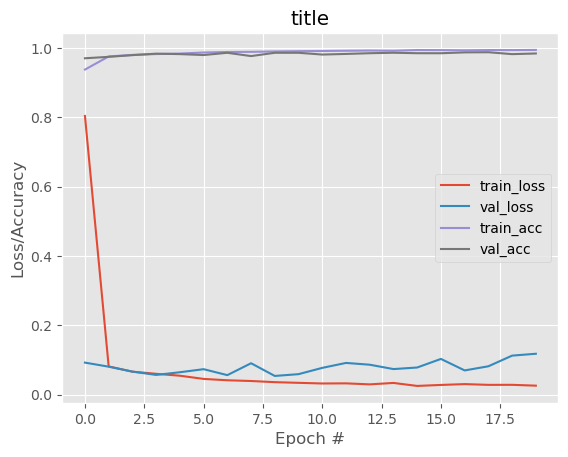

In [10]:
pyplot.style.use("ggplot")
pyplot.figure()
pyplot.plot(range(epochs), fit.history["loss"], label = "train_loss")
pyplot.plot(range(epochs), fit.history["val_loss"], label = "val_loss")
pyplot.plot(range(epochs), fit.history["accuracy"], label = "train_acc")
pyplot.plot(range(epochs), fit.history["val_accuracy"], label = "val_acc")
pyplot.title("title")
pyplot.xlabel("Epoch #")
pyplot.ylabel("Loss/Accuracy")
pyplot.legend()
pyplot.show()

INFO:tensorflow:Assets written to: CNN-MNIST/assets


INFO:tensorflow:Assets written to: CNN-MNIST/assets


4
(28, 28)
1/1 [==============================] - 0s 13ms/step
predict [[2.9446527e-29 1.4116279e-19 7.1454669e-19 6.5926945e-25 1.0000000e+00
  3.8927225e-21 3.7222396e-26 2.2684872e-18 1.0546558e-16 5.5904789e-16]]
1/1 [==============================] - 0s 43ms/step
predict [[2.9446527e-29 1.4116279e-19 7.1454669e-19 6.5926945e-25 1.0000000e+00
  3.8927225e-21 3.7222396e-26 2.2684872e-18 1.0546558e-16 5.5904789e-16]]


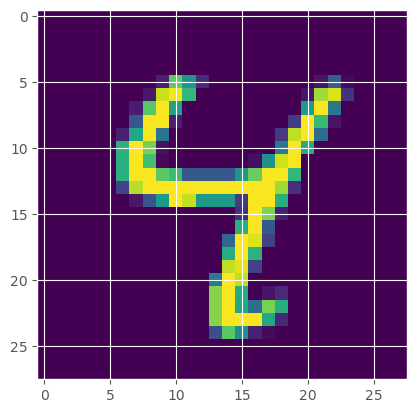

In [13]:
model.save("CNN-MNIST")
model1: Model = load_model("CNN-MNIST")
print(test_Y[6])
print(test_X[6].shape)
pyplot.imshow(test_X[6])
print("predict",model.predict(test_X[6].reshape((1,28,28))))
print("predict",model1.predict(test_X[6].reshape((1,28,28))))